In [1]:
import pandas
import matplotlib.pyplot as plt
import georasters as gr

%matplotlib inline
from sklearn.cluster import KMeans
from sklearn import preprocessing
from mpl_toolkits.mplot3d import Axes3D

import seaborn as sns
sns.set(color_codes=True)
sns.set(font_scale=2.4)
# from PIL import Image

In [2]:
# dictionary holding filename and according element name
names = {'LP_GRS_Th_Global_2ppd.tif': 'Thorium', 
         'LP_GRS_Fe_Global_2ppd.tif': 'Iron',
         'LP_GRS_H_Global_2ppd.tif' : 'Hydrogen'
        }

# input file (tif or xyz) -> output pandas dataframe
def fileToDataframe(file):
    df = gr.from_file(file).to_pandas()
    df = df[["x", "y", "value"]].copy()
    df.columns = ["x", "y", names[file]]
    return df


# uses above function to create pandas dataframes (which is essential for all other functions)
if "LP_GRS_Th_Global_2ppd.tif" in names:
    df1 = fileToDataframe("LP_GRS_Th_Global_2ppd.tif")
if "LP_GRS_Fe_Global_2ppd.tif" in names:
    df2 = fileToDataframe("LP_GRS_Fe_Global_2ppd.tif")
if "LP_GRS_H_Global_2ppd.tif" in names:
    df3 = fileToDataframe("LP_GRS_H_Global_2ppd.tif")
    

In [3]:
print(df1.head())
print(df2.head())
print(df3.head())

              x           y  Thorium
0 -5.458203e+06  2729101.54       17
1 -5.443041e+06  2729101.54       17
2 -5.427880e+06  2729101.54       17
3 -5.412718e+06  2729101.54       17
4 -5.397556e+06  2729101.54       17
              x           y  Iron
0 -5.458203e+06  2729101.54    71
1 -5.443041e+06  2729101.54    71
2 -5.427880e+06  2729101.54    71
3 -5.412718e+06  2729101.54    71
4 -5.397556e+06  2729101.54    71
              x           y  Hydrogen
0 -5.458203e+06  2729101.54      1555
1 -5.443041e+06  2729101.54      1555
2 -5.427880e+06  2729101.54      1555
3 -5.412718e+06  2729101.54      1555
4 -5.397556e+06  2729101.54      1556


In [4]:
def normalizer(df):
    MMS = preprocessing.MinMaxScaler()
    normalized = MMS.fit_transform(df)
    normalized = pandas.DataFrame(normalized)
    return normalized

In [5]:
# for i in zip(range(4)):
#     print(i)
# for l in zip([0,1,2,3,4]): 
#     print(l)
    

In [6]:
colors = ['red', 'blue', 'green', 'purple', 'cyan', 'orange', 'yellow', 'gold', 'navy' , 'gray']

def kmean_algo_visualizer(df, cluster_size):
    kmeans = KMeans(n_clusters = cluster_size)
    kmeans.fit(df)
    centers = kmeans.cluster_centers_
    labels = kmeans.labels_
    fig = plt.figure(figsize=(24,15))
    ax = fig.gca(projection='3d')

    
    for l, c in zip(range(cluster_size), colors):
        current_members = (labels == l)
        current_center = centers[1]
        ax.scatter(df.iloc[current_members,0], df.iloc[current_members,1], df.iloc[current_members, 2], color=c, marker='.', alpha=0.025)
        
    ax.scatter(centers[:,0], centers[:,1], centers[:,2], marker='X', c='black', alpha=1)
    
    

In [7]:
def kmeans_decision_algo(df, cluster, normalized):
    if(normalized == True):
        kmean_algo_visualizer(normalizer(df), cluster)
    else:
        kmean_algo_visualizer(df, cluster)

# Create Dataframes

In [8]:
elements_location_df = df1
elements_location_df['Hydrogen'] = df3['Hydrogen']
elements_location_df['Iron'] = df2['Iron']

In [9]:
elements_location_df.head()

x           y  Thorium  Hydrogen  Iron
0 -5.458203e+06  2729101.54       17      1555    71
1 -5.443041e+06  2729101.54       17      1555    71
2 -5.427880e+06  2729101.54       17      1555    71
3 -5.412718e+06  2729101.54       17      1555    71
4 -5.397556e+06  2729101.54       17      1556    71

In [10]:
element_df = df1[['Thorium']]
element_df['Iron'] = df2['Iron']
element_df['Hydrogen'] = df3['Hydrogen']

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [11]:
element_df.head()

Thorium  Iron  Hydrogen
0       17    71      1555
1       17    71      1555
2       17    71      1555
3       17    71      1555
4       17    71      1556

# KMeans with lat long as parameters also

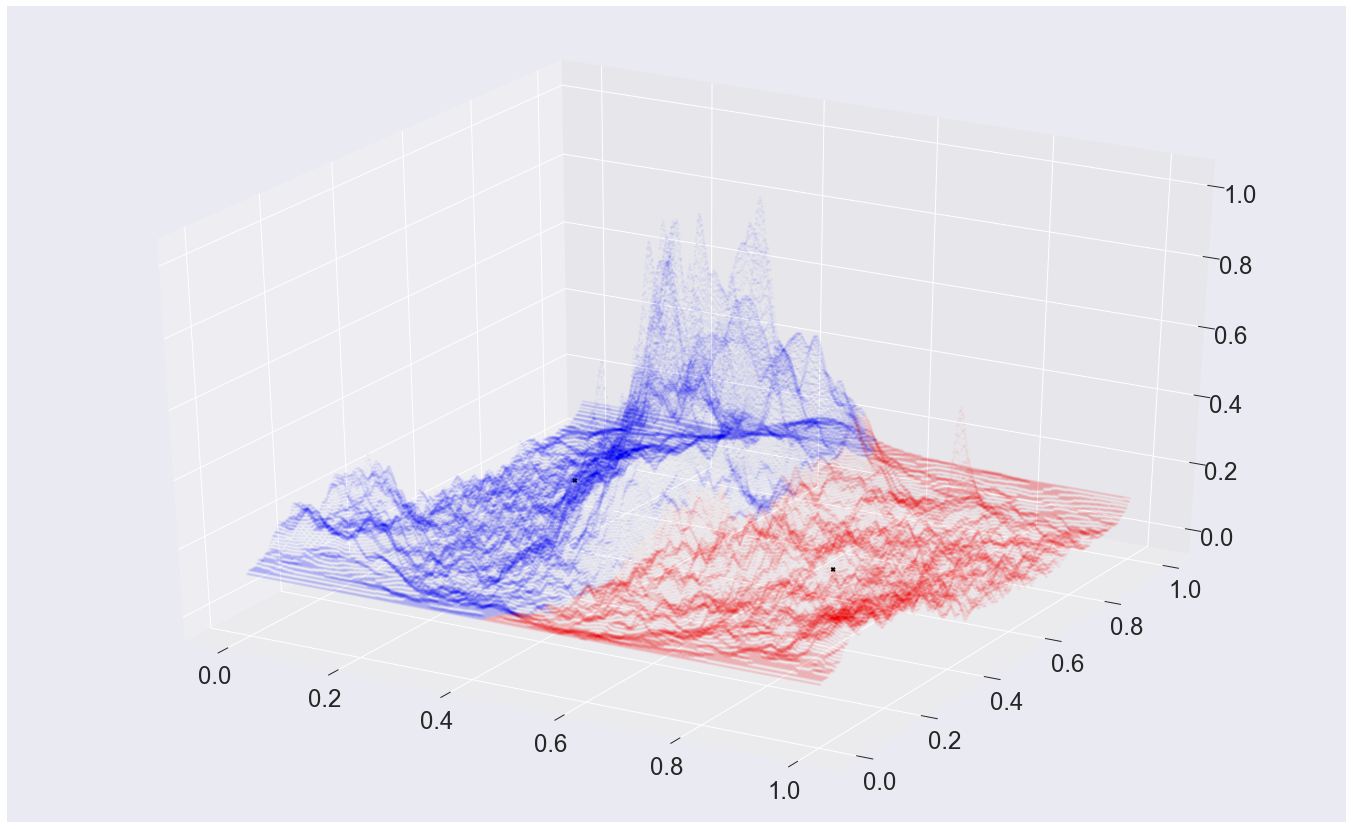

In [20]:
kmeans_decision_algo(elements_location_df, 2, True)

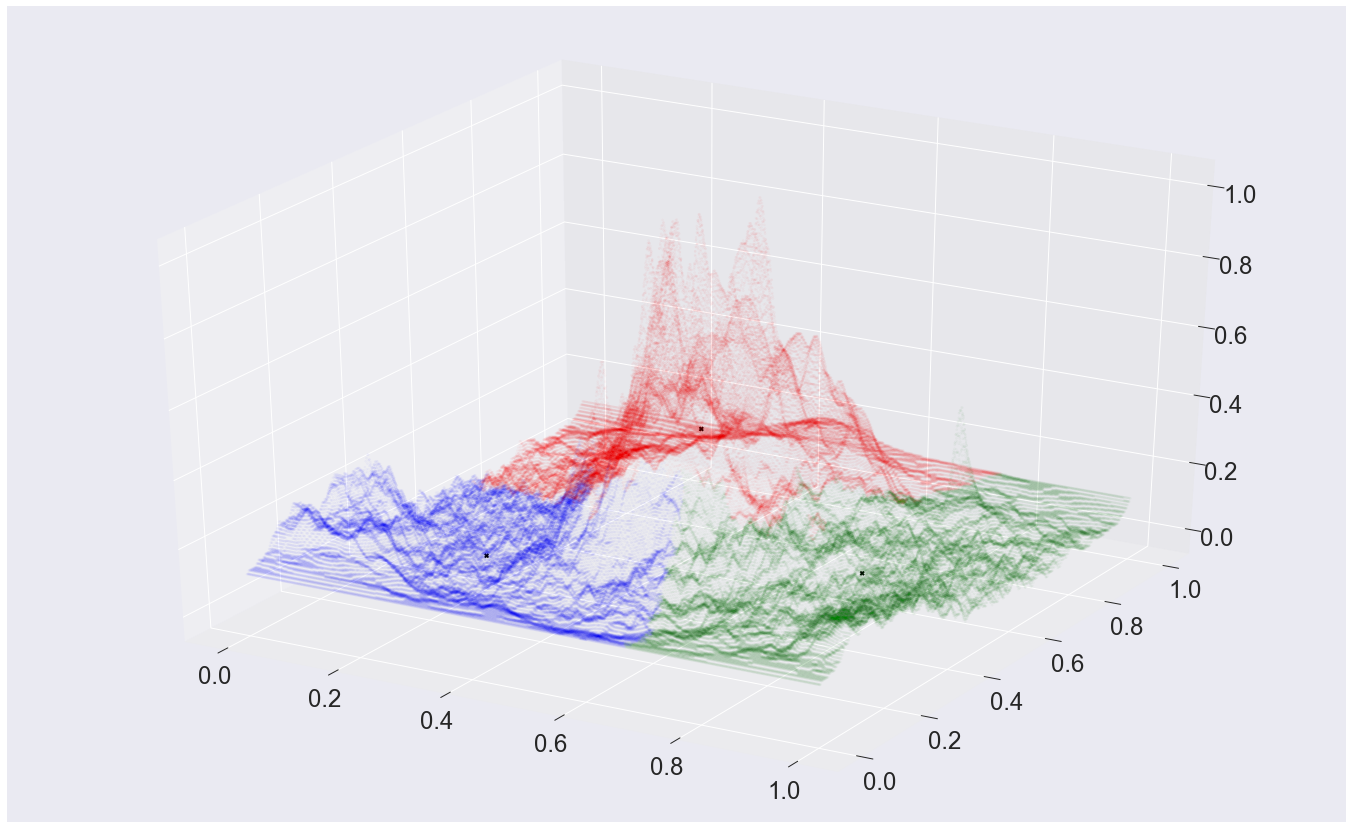

In [12]:
kmeans_decision_algo(elements_location_df, 3, True)

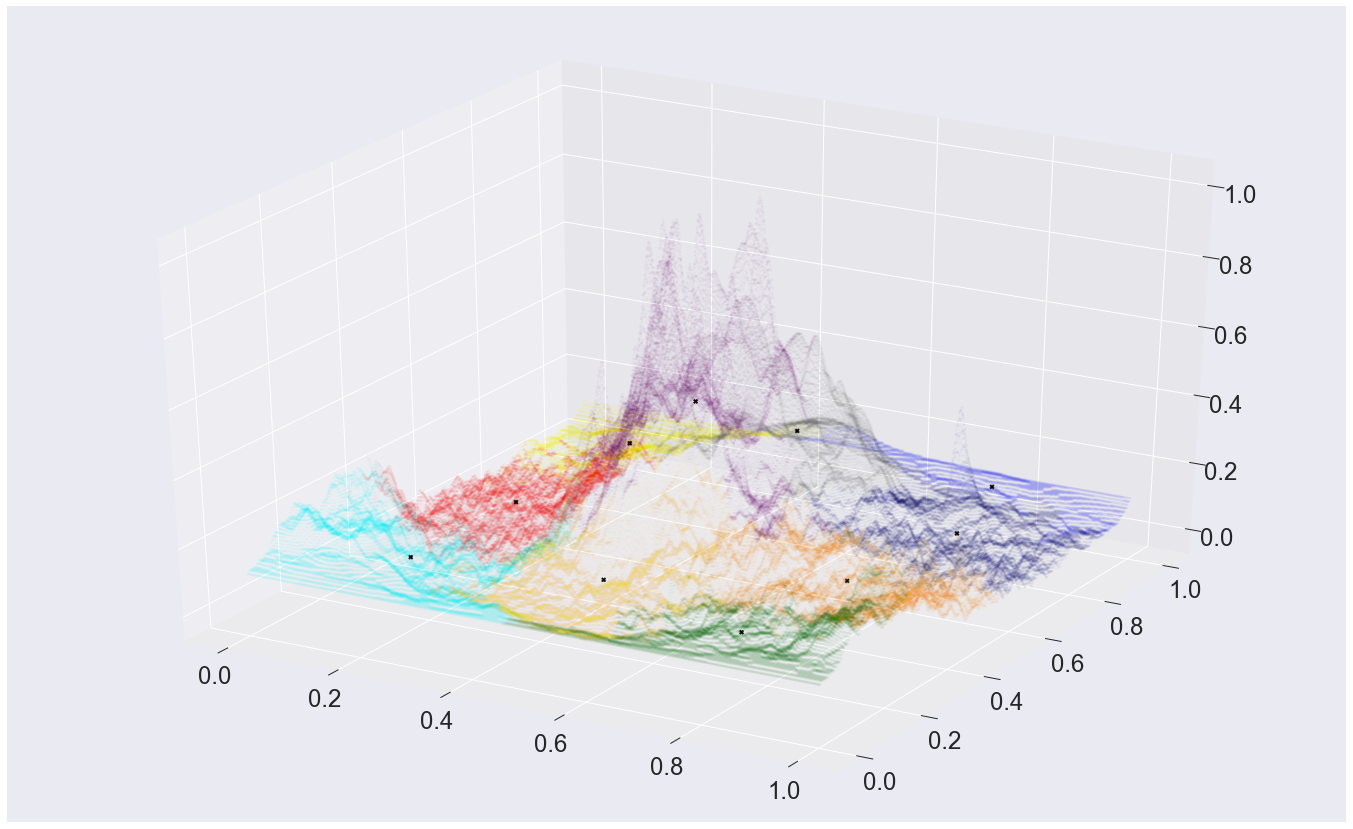

In [13]:
kmeans_decision_algo(elements_location_df, 10, True)

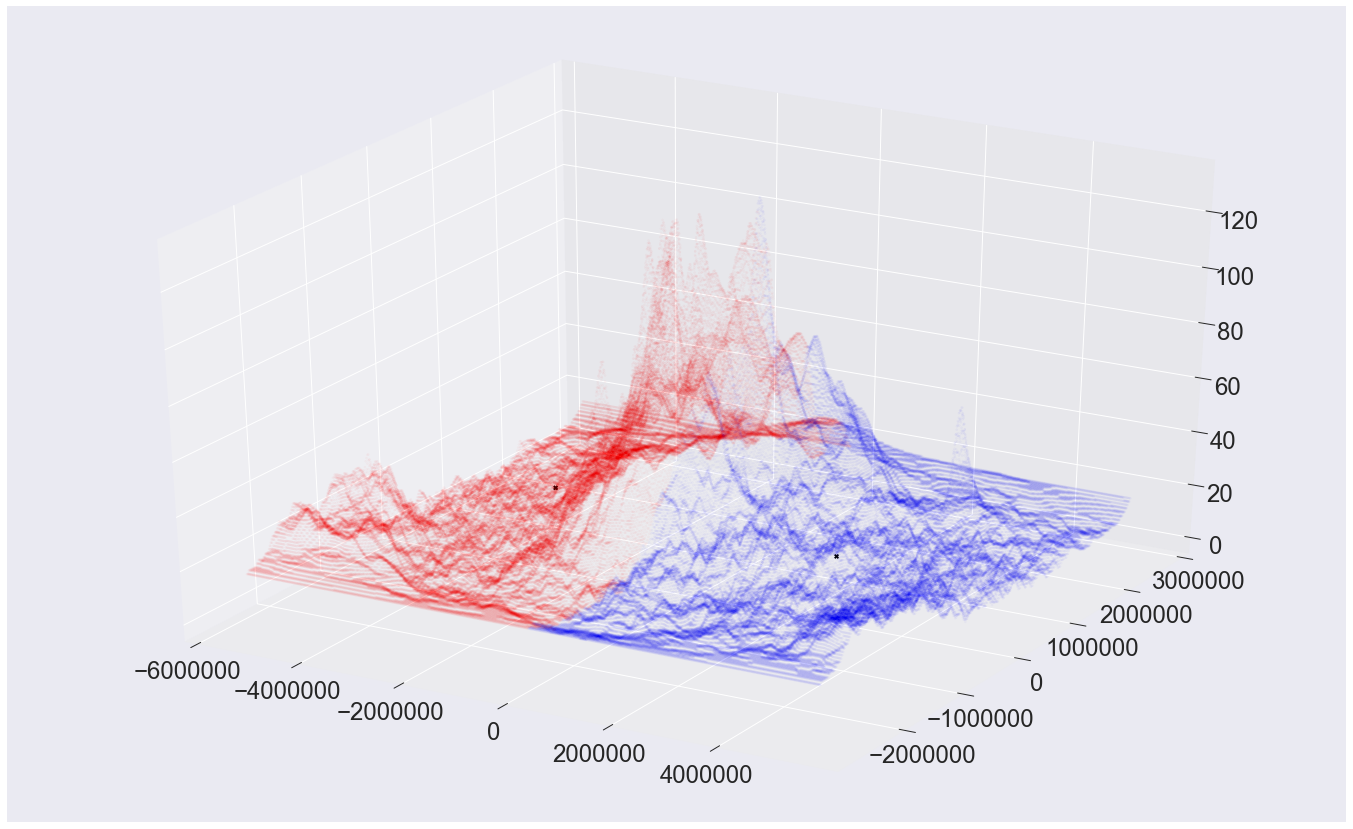

In [22]:
kmeans_decision_algo(elements_location_df, 2, False)

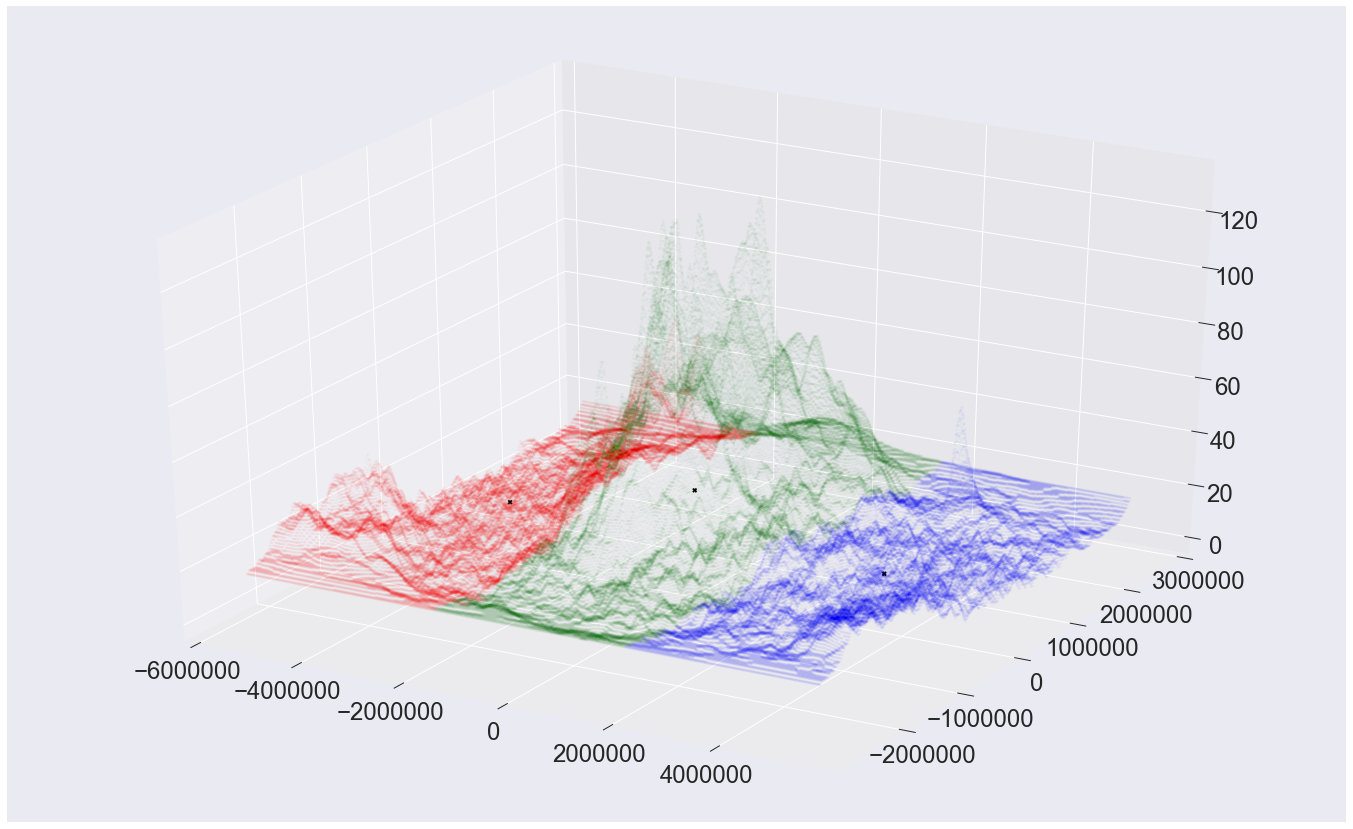

In [14]:
kmeans_decision_algo(elements_location_df, 3, False)

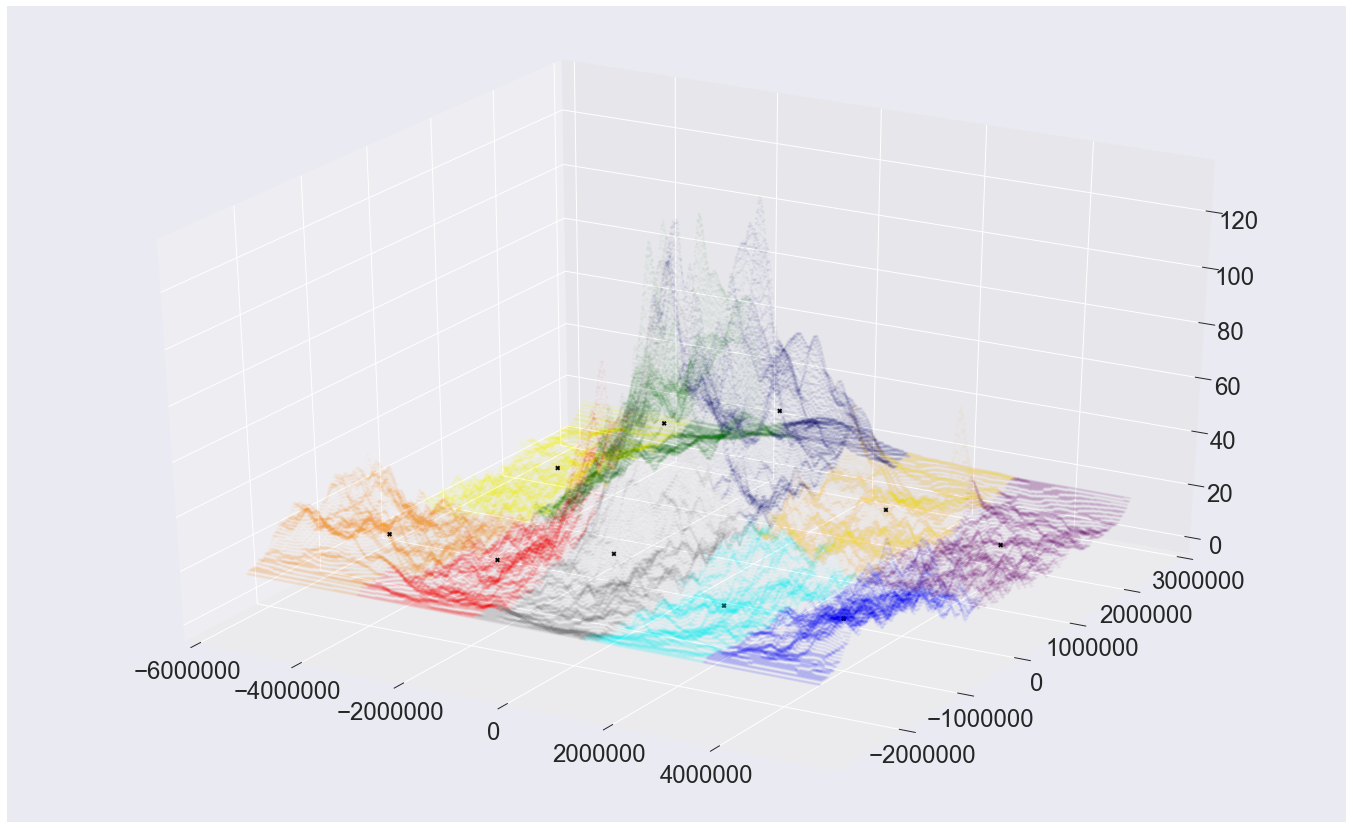

In [15]:
kmeans_decision_algo(elements_location_df, 10, False)

# KMeans with only elements

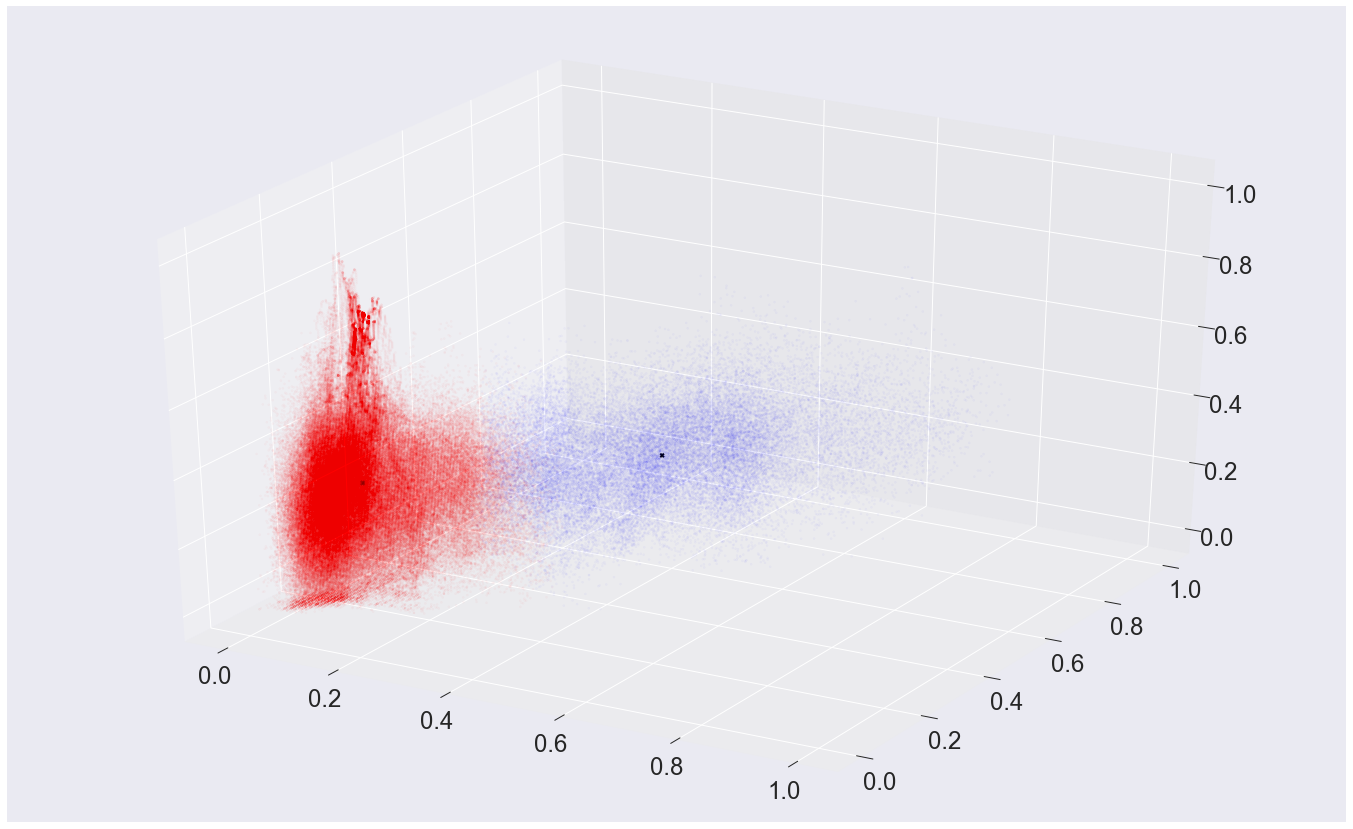

In [21]:
kmeans_decision_algo(element_df, 2, True)

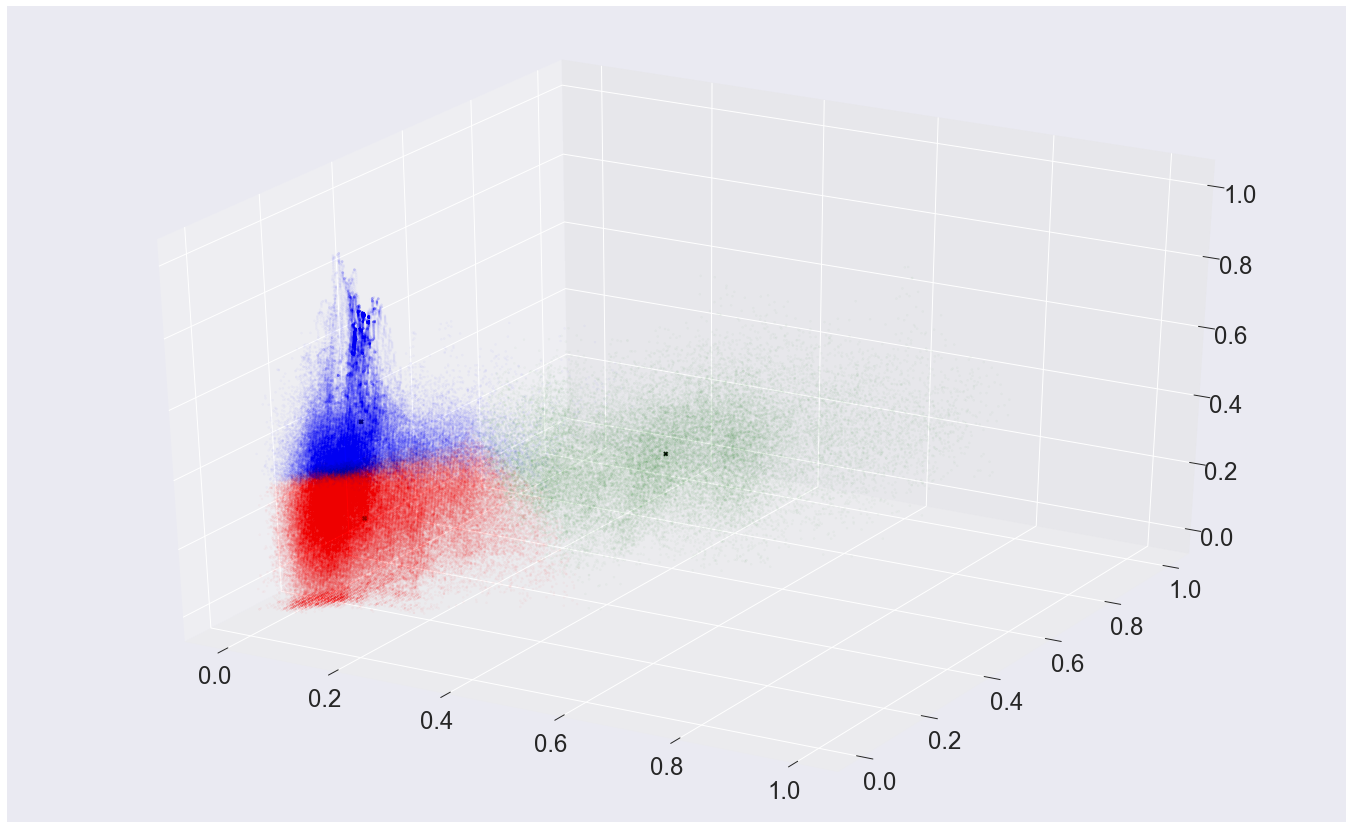

In [16]:
kmeans_decision_algo(element_df, 3, True)

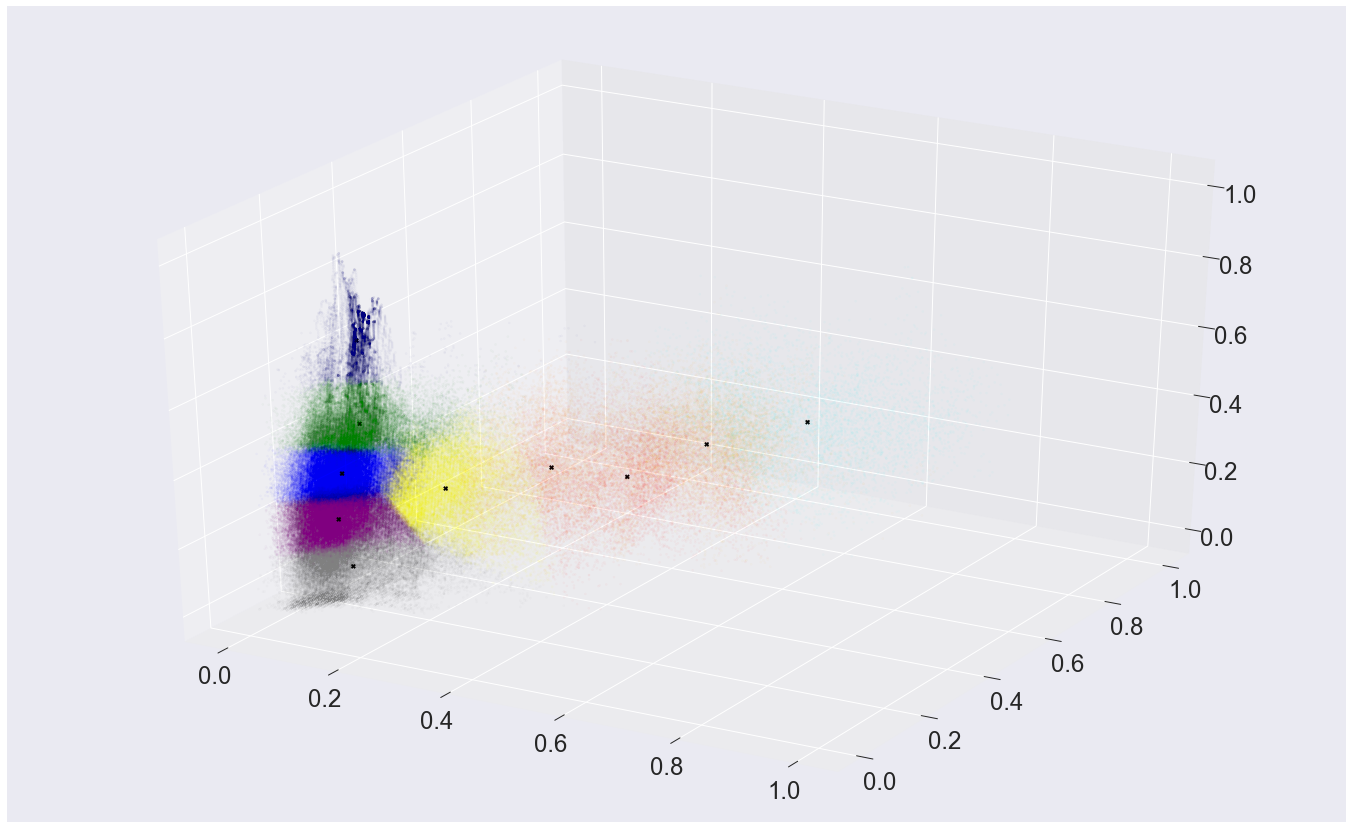

In [17]:
kmeans_decision_algo(element_df, 10, True)

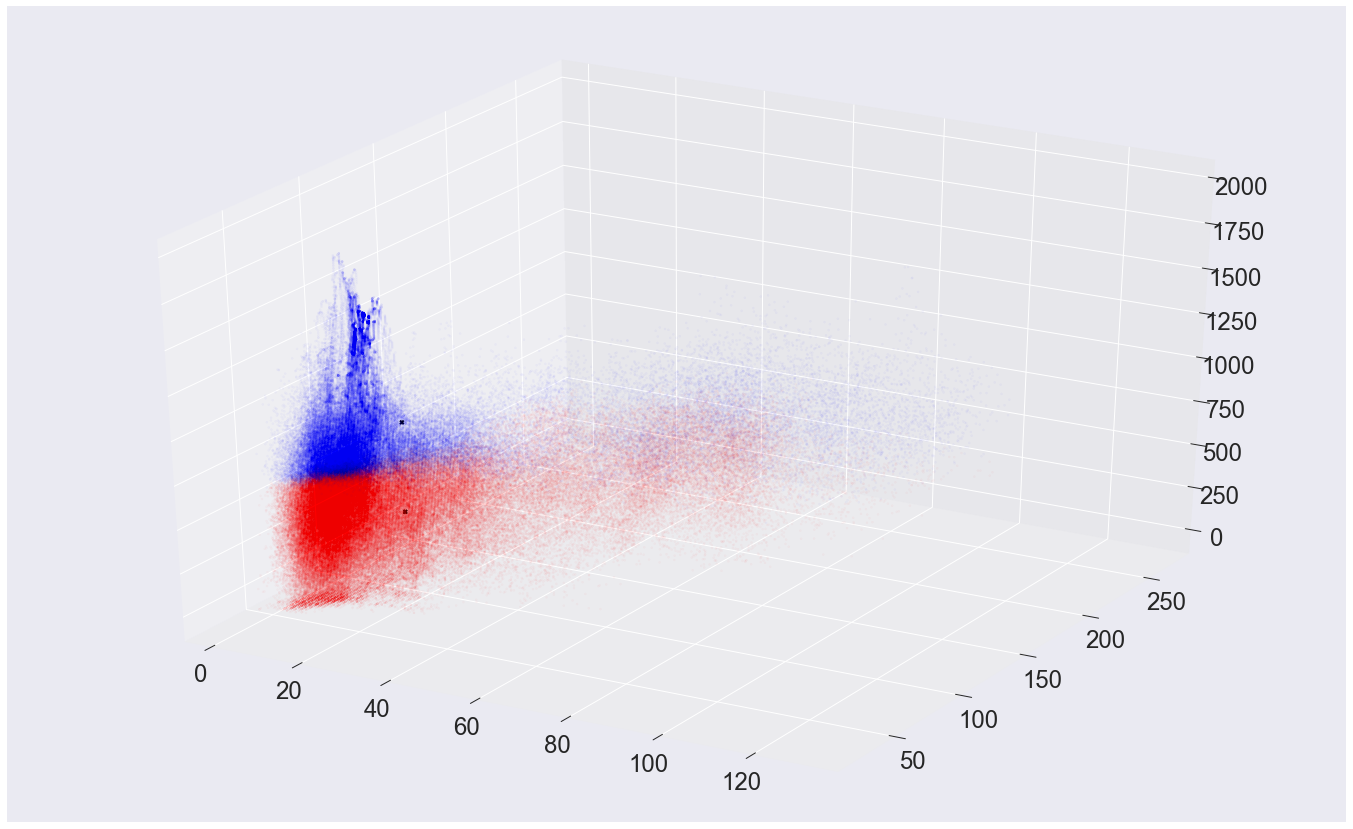

In [23]:
kmeans_decision_algo(element_df, 2, False)

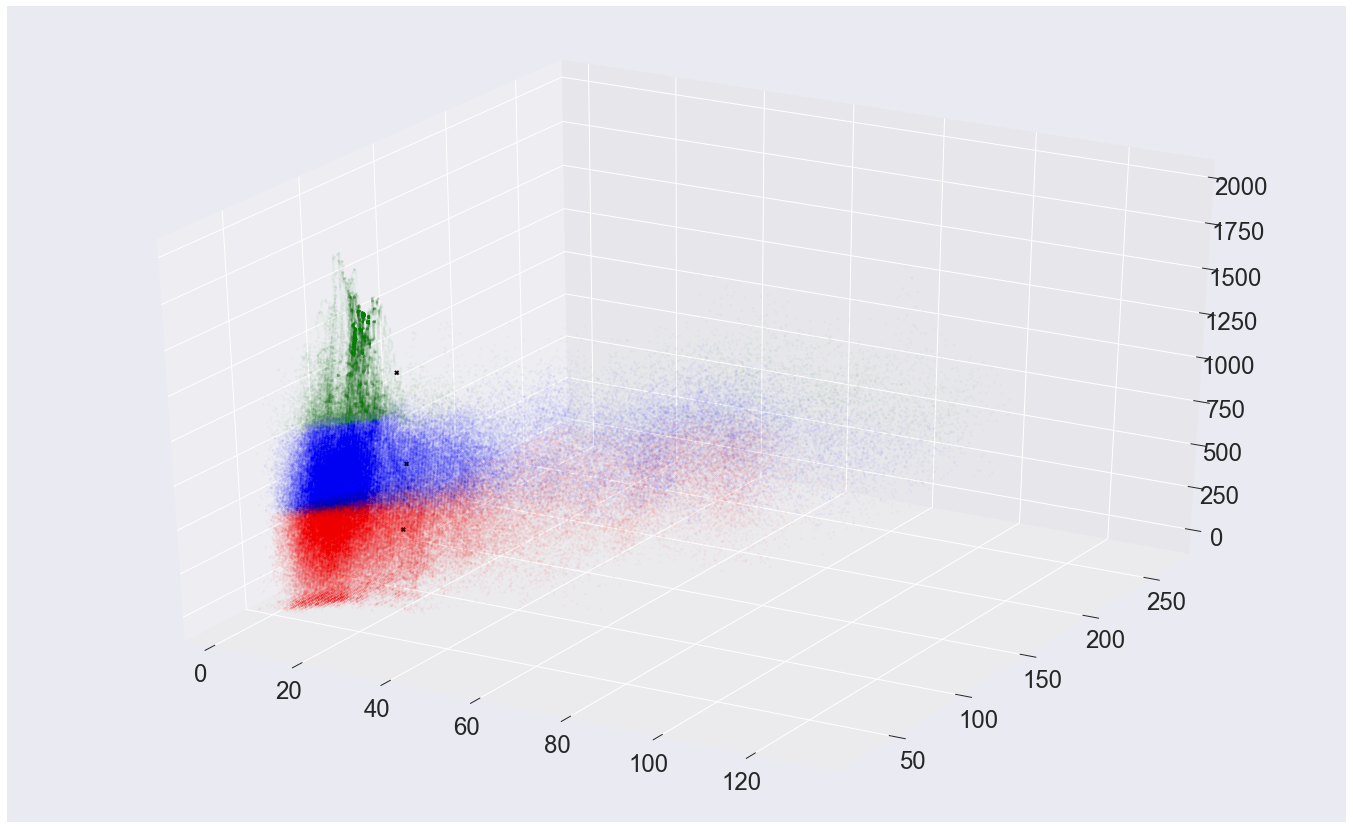

In [18]:
kmeans_decision_algo(element_df, 3, False)

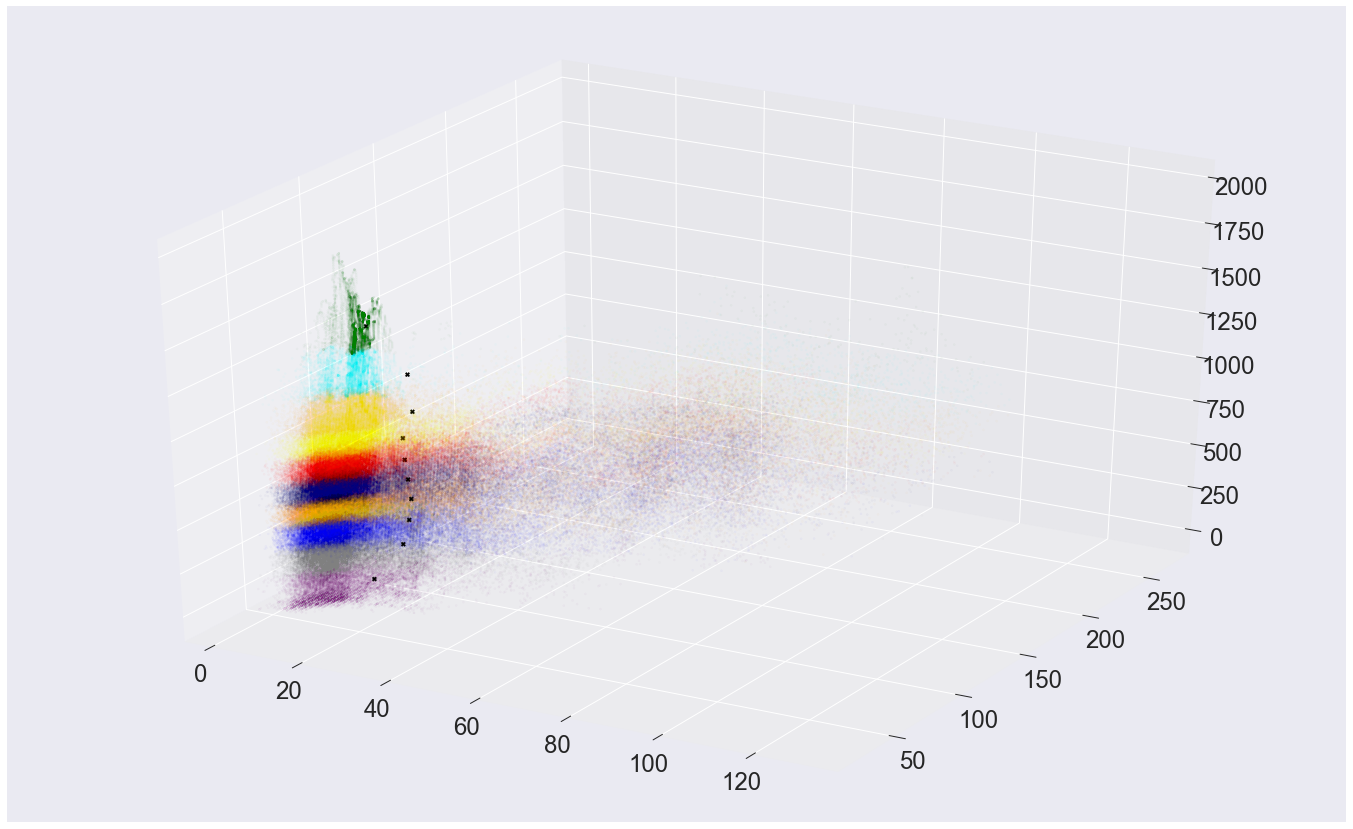

In [19]:
kmeans_decision_algo(element_df, 10, False)